In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/Users/olegyarygin/PycharmProjects/stepic_pandas/dataset/aug_train.csv")

In [6]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [7]:
df["target"].mean() # 25% хотят сменить работу .mean - функция агригации 

0.24934753105752167

In [8]:
t = df.groupby("gender")["target"].agg(["count","mean"])

In [9]:
t["count"].sum()

14650

In [10]:
len(df)

19158

In [11]:
t = df.groupby("gender", dropna=False)["target"].agg(["count","mean"])

In [12]:
t["count"].sum()

19158

In [13]:
df.groupby("education_level", dropna=False)["target"].agg(["count", "mean"])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


<Axes: xlabel='education_level'>

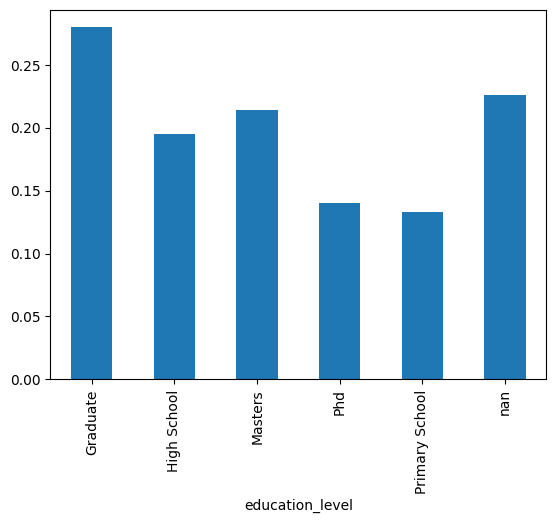

In [14]:
df.groupby("education_level", dropna=False)["target"].mean().plot(kind="bar")

# Сводники для непрерывных переменных 

In [15]:
df["city_development_index_group"] = pd.cut(df["city_development_index"], 5)

In [16]:
df["city_development_index_group_q"] = pd.qcut(df["city_development_index"], 5, duplicates="drop")

In [17]:
t = df.groupby("city_development_index_group_q", dropna=False)["target"].agg(["count","mean"])

In [18]:
t["count"].sum()

19158

In [19]:
t

,count,mean
city_development_index_group_q,,
"(0.447, 0.691]",3869,0.550530
"(0.691, 0.878]",3827,0.206428
"(0.878, 0.92]",8925,0.178375
"(0.92, 0.949]",2537,0.104454


<Axes: xlabel='city_development_index_group_q'>

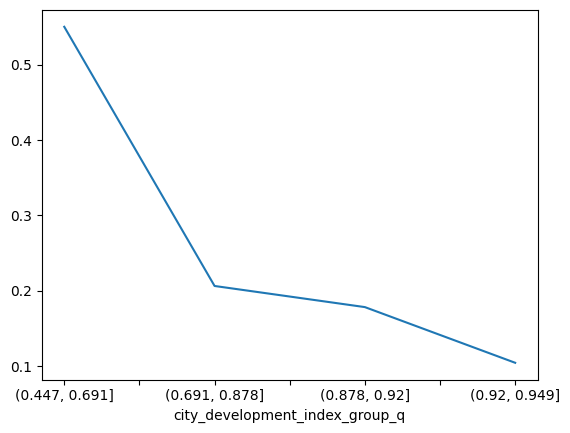

In [20]:
t["mean"].plot()

In [21]:
df["city_development_index_group_custom"] = pd.cut(df["city_development_index"],
                                                   [-float("inf"), 0, 0.1, 0.2, 0.5, float("inf")])

In [22]:
df.groupby("city_development_index_group_custom", dropna=False)["target"].agg(["count","mean"])

,count,mean
city_development_index_group_custom,,
"(-inf, 0.0]",0,NaN
"(0.0, 0.1]",0,NaN
"(0.1, 0.2]",0,NaN
"(0.2, 0.5]",63,0.587302
"(0.5, inf]",19095,0.248233


# Группировка категориальных переменных 

In [23]:
def education_group(x):
    if x in ["High School", "Primary School"]:
        return "School"
    if x in ["Masters", "Phd"]:
        return "Masters_and_Phd"
    return x 

In [24]:
df["new_education_level"] = df["education_level"].apply(education_group)


In [25]:
df.groupby("new_education_level", dropna=False)["target"].agg(["count","mean"])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters_and_Phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [26]:
# Пример как можно сделать без функции через replace 
df["new_education_level"].replace("Primary School", "School") # Трюк 

0               Graduate
1               Graduate
2               Graduate
3               Graduate
4        Masters_and_Phd
              ...       
19153           Graduate
19154           Graduate
19155           Graduate
19156             School
19157             School
Name: new_education_level, Length: 19158, dtype: object

# Функция с несколькими столбцами 

In [27]:
def new_training_hours(row):
    if row["education_level"] == "Phd":
        return row["training_hours"] + 1000 
    return row["training_hours"]

In [28]:
df["new_training_hours"] = df.apply(new_training_hours, axis=1)

In [29]:
df[df["education_level"] == "Phd"]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q,city_development_index_group_custom,new_education_level,new_training_hours
37,10164,city_114,0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,4,42,1.0,"(0.849, 0.949]","(0.92, 0.949]","(0.5, inf]",Masters_and_Phd,1042
121,13915,city_16,0.910,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,2,20,1.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Masters_and_Phd,1020
130,3921,city_36,0.893,NaN,No relevent experience,no_enrollment,Phd,STEM,>20,1000-4999,Public Sector,>4,4,0.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Masters_and_Phd,1004
135,23947,city_103,0.920,NaN,No relevent experience,no_enrollment,Phd,STEM,NaN,NaN,NaN,NaN,70,0.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Masters_and_Phd,1070
152,31786,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,>4,14,0.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Masters_and_Phd,1014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,1477,city_162,0.767,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,10000+,Pvt Ltd,1,34,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Masters_and_Phd,1034
18800,18365,city_103,0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,15,50-99,Funded Startup,4,108,0.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Masters_and_Phd,1108
18807,229,city_114,0.926,Male,No relevent experience,no_enrollment,Phd,STEM,14,5000-9999,Public Sector,>4,9,1.0,"(0.849, 0.949]","(0.92, 0.949]","(0.5, inf]",Masters_and_Phd,1009
18944,2678,city_104,0.924,NaN,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,NaN,27,0.0,"(0.849, 0.949]","(0.92, 0.949]","(0.5, inf]",Masters_and_Phd,1027


# Pivot table 

In [30]:
df.groupby("new_education_level", dropna=False)["target"].agg(["count","mean"])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters_and_Phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [31]:
t = df.pivot_table(index="new_education_level", values="target", aggfunc=["count", "mean"])

In [32]:
t.reset_index()

,new_education_level,count,mean
,,target,target
0,Graduate,11598,0.279790
1,Masters_and_Phd,4775,0.207958
2,School,2325,0.187097


In [33]:
t.columns = [' '.join(col).strip() for col in t.columns.values]

In [34]:
t.reset_index()

,new_education_level,count target,mean target
0,Graduate,11598,0.279790
1,Masters_and_Phd,4775,0.207958
2,School,2325,0.187097


In [35]:
df.pivot_table(index="new_education_level", values="target", columns="gender",
               aggfunc=["count", "mean"])

count                  mean                    
gender              Female  Male Other    Female      Male     Other
new_education_level                                                 
Graduate               773  8144   112  0.279431  0.257122  0.330357
Masters_and_Phd        386  3237    31  0.233161  0.186284  0.096774
School                  71  1598    39  0.267606  0.171464  0.205128

In [36]:
df.groupby(["new_education_level","gender"], dropna=False)["target"].agg(["count","mean"])

count      mean
new_education_level gender                 
Graduate            Female    773  0.279431
                    Male     8144  0.257122
                    Other     112  0.330357
                    NaN      2569  0.349552
Masters_and_Phd     Female    386  0.233161
                    Male     3237  0.186284
                    Other      31  0.096774
                    NaN      1121  0.264942
School              Female     71  0.267606
                    Male     1598  0.171464
                    Other      39  0.205128
                    NaN       617  0.217180
NaN                 Female      8  0.125000
                    Male      242  0.169421
                    Other       9  0.222222
                    NaN       201  0.298507

In [37]:
t = (df.groupby(["new_education_level"],dropna=False)[["target", "city_development_index"]]
     .agg(["count","mean"]).reset_index())

In [38]:
t

new_education_level target           city_development_index          
                       count      mean                  count      mean
0            Graduate  11598  0.279790                  11598  0.823731
1     Masters_and_Phd   4775  0.207958                   4775  0.840032
2              School   2325  0.187097                   2325  0.836080
3                 NaN    460  0.226087                    460  0.805207

# Heatmap

In [39]:
df["gender"] = df["gender"].fillna("no_info")

In [40]:
t = df.pivot_table(index="new_education_level", values="target", columns="gender",
               aggfunc=["mean"])

In [41]:
t 

mean                              
gender                 Female      Male     Other   no_info
new_education_level                                        
Graduate             0.279431  0.257122  0.330357  0.349552
Masters_and_Phd      0.233161  0.186284  0.096774  0.264942
School               0.267606  0.171464  0.205128  0.217180

In [42]:
import seaborn as sns

<Axes: xlabel='None-gender', ylabel='new_education_level'>

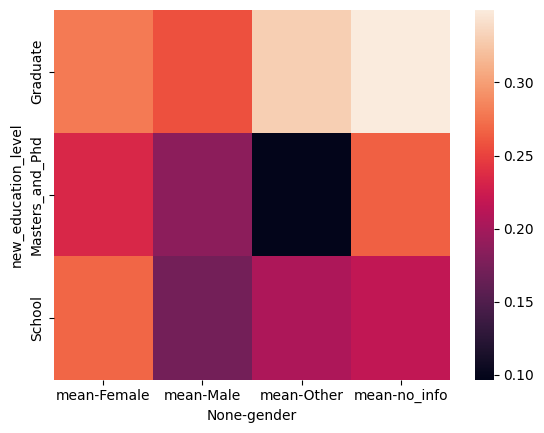

In [43]:
sns.heatmap(t)

# Кореляция и phik

In [44]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q,city_development_index_group_custom,new_education_level,new_training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate,47
2,11561,city_21,0.624,no_info,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,"(0.548, 0.648]","(0.447, 0.691]","(0.5, inf]",Graduate,83
3,33241,city_115,0.789,no_info,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Masters_and_Phd,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,"(0.849, 0.949]","(0.691, 0.878]","(0.5, inf]",Graduate,42
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,52
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,44
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",School,97


In [45]:
s = df[["city_development_index", "training_hours", "target"]].corr() # Матрица корреляций 

In [46]:
s

,city_development_index,training_hours,target
city_development_index,1.000000,0.001920,-0.341665
training_hours,0.001920,1.000000,-0.021577
target,-0.341665,-0.021577,1.000000


<Axes: >

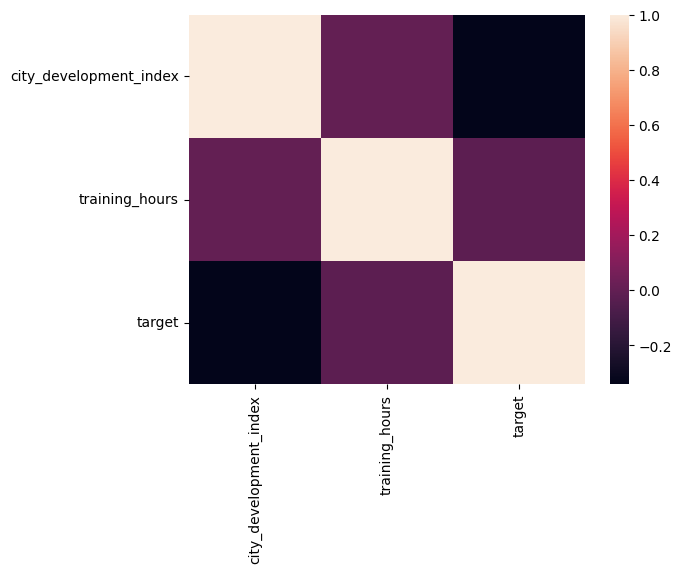

In [47]:
sns.heatmap(s)

# Phik

In [48]:
import phik
from phik import resources, report

In [49]:
phick_overview = df.phik_matrix()

interval columns not set, guessing: ['enrollee_id', 'city_development_index', 'training_hours', 'target', 'new_training_hours']


In [50]:
phick_overview

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q,city_development_index_group_custom,new_education_level,new_training_hours
enrollee_id,1.000000,0.214019,0.125181,0.125045,0.073145,0.051188,0.076123,0.030968,0.086949,0.032956,0.022543,0.045252,0.021517,0.067472,0.118153,0.101484,0.038811,0.061054,0.033738
city,0.214019,1.000000,1.000000,0.235773,0.152621,0.376293,0.363706,0.178508,0.346552,0.249869,0.224174,0.240315,0.075165,0.477283,1.000000,1.000000,0.797284,0.428804,0.121074
city_development_index,0.125181,1.000000,1.000000,0.163535,0.101448,0.245979,0.224368,0.129083,0.307770,0.130592,0.112234,0.172067,0.000000,0.482287,1.000000,0.886906,0.837862,0.203795,0.062888
gender,0.125045,0.235773,0.163535,1.000000,0.175232,0.081010,0.051922,0.087460,0.202654,0.036975,0.073239,0.093596,0.009124,0.116653,0.114481,0.228761,0.034018,0.052497,0.024818
relevent_experience,0.073145,0.152621,0.101448,0.175232,1.000000,0.237586,0.259716,0.098661,0.500107,0.074259,0.284810,0.539529,0.020727,0.199859,0.059986,0.094370,0.026304,0.187300,0.039599
enrolled_university,0.051188,0.376293,0.245979,0.081010,0.237586,1.000000,0.215062,0.151561,0.434500,0.067175,0.231786,0.430596,0.000000,0.093803,0.174196,0.147038,0.027827,0.400491,0.101667
education_level,0.076123,0.363706,0.224368,0.051922,0.259716,0.215062,1.000000,0.104318,0.302908,0.082131,0.116321,0.253235,0.030104,0.075999,0.127624,0.119003,0.034684,1.000000,0.639933
major_discipline,0.030968,0.178508,0.129083,0.087460,0.098661,0.151561,0.104318,1.000000,0.116505,0.038923,0.089031,0.047317,0.000000,0.029200,0.101880,0.129442,0.028407,0.084839,0.020618
experience,0.086949,0.346552,0.307770,0.202654,0.500107,0.434500,0.302908,0.116505,1.000000,0.127647,0.112121,0.468247,0.000000,0.238725,0.335891,0.358784,0.040510,0.359742,0.148504
company_size,0.032956,0.249869,0.130592,0.036975,0.074259,0.067175,0.082131,0.038923,0.127647,1.000000,0.332074,0.102736,0.000000,0.071953,0.095912,0.150605,0.011386,0.106308,0.041586


<Axes: >

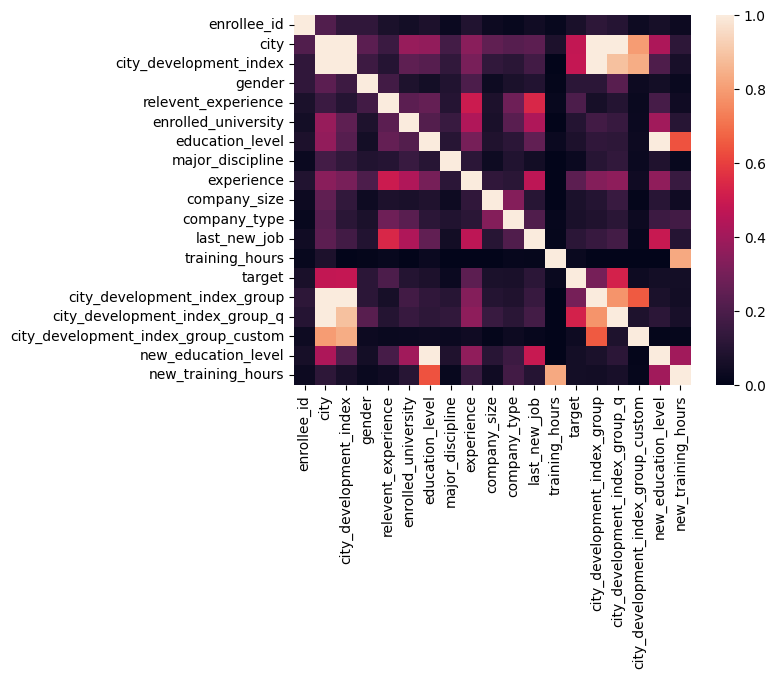

In [51]:
sns.heatmap(phick_overview)

In [52]:
phick_overview["target"].sort_values(ascending=False)

target                                 1.000000
city_development_index_group_q         0.523691
city_development_index                 0.482287
city                                   0.477283
city_development_index_group           0.302403
experience                             0.238725
relevent_experience                    0.199859
gender                                 0.116653
last_new_job                           0.114708
enrolled_university                    0.093803
education_level                        0.075999
company_size                           0.071953
enrollee_id                            0.067472
company_type                           0.066792
new_training_hours                     0.054314
new_education_level                    0.053437
city_development_index_group_custom    0.035805
major_discipline                       0.029200
training_hours                         0.026849
Name: target, dtype: float64

# Проверяем есть ли связь

In [56]:
df["city_development_index_group_q"]

0         (0.878, 0.92]
1        (0.691, 0.878]
2        (0.447, 0.691]
3        (0.691, 0.878]
4        (0.691, 0.878]
              ...      
19153    (0.691, 0.878]
19154     (0.878, 0.92]
19155     (0.878, 0.92]
19156    (0.691, 0.878]
19157    (0.691, 0.878]
Name: city_development_index_group_q, Length: 19158, dtype: category
Categories (4, interval[float64, right]): [(0.447, 0.691] < (0.691, 0.878] < (0.878, 0.92] < (0.92, 0.949]]

In [61]:
# Строим Сводник 
df.groupby("city_development_index_group_q")["target"].agg(["count", "mean"])

,count,mean
city_development_index_group_q,,
"(0.447, 0.691]",3869,0.550530
"(0.691, 0.878]",3827,0.206428
"(0.878, 0.92]",8925,0.178375
"(0.92, 0.949]",2537,0.104454


In [63]:
# Строим Сводник 
t = df.groupby("city")["target"].agg(["count", "mean"])

In [65]:
t.sort_values("count", ascending=False).head(5)

,count,mean
city,,
city_103,4355,0.213088
city_21,2702,0.591044
city_16,1533,0.116765
city_114,1336,0.099551
city_160,845,0.235503


In [ ]:
# Доля желающих сменит работу 

<Axes: xlabel='city'>

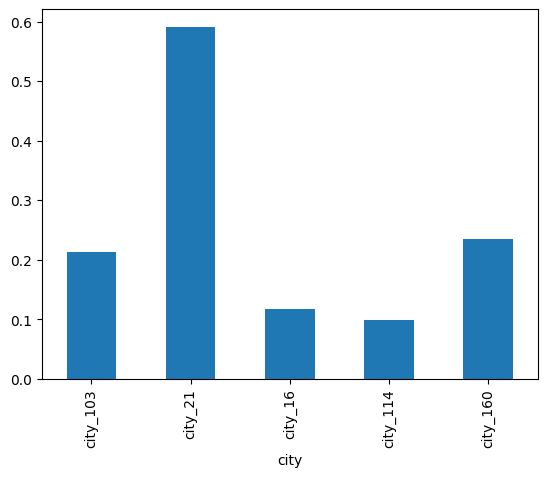

In [70]:
t.sort_values("count", ascending=False).head(5)["mean"].plot(kind="bar")

In [80]:
df.groupby("experience")["target"].agg(["count", "mean"])

,count,mean
experience,,
1,549,0.424408
10,985,0.210152
11,664,0.227410
12,494,0.186235
13,399,0.192982
14,586,0.182594
15,686,0.166181
16,508,0.141732
17,342,0.166667


In [77]:
t = df.groupby("city")[["target","city_development_index"]].agg(["count", "mean"])

In [78]:
t.columns = [' '.join(col).strip() for col in t.columns.values]

In [79]:
t

,target count,target mean,city_development_index count,city_development_index mean
city,,,,
city_1,26,0.115385,26,0.847
city_10,86,0.104651,86,0.895
city_100,275,0.236364,275,0.887
city_101,75,0.573333,75,0.558
city_102,304,0.171053,304,0.804
...,...,...,...,...
city_93,26,0.192308,26,0.865
city_94,26,0.384615,26,0.698
city_97,104,0.076923,104,0.925


In [90]:
df.groupby("experience_int")["target"].agg(["count", "mean"])

,count,mean
experience_int,,
-1,65,0.353846
0,522,0.454023
1,549,0.424408
2,1127,0.331854
3,1354,0.353028
4,1403,0.325731
5,1430,0.288112
6,1216,0.282072
7,1028,0.294747


In [87]:
df["experience_int"] = df["experience"].replace("<1", "0").replace(">20", "999").fillna(-1).astype(int)

In [91]:
df["experience_group"] = pd.qcut(df["experience_int"], 5)

In [92]:
df.groupby("experience_int")["target"].agg(["count", "mean"])

,count,mean
experience_int,,
-1,65,0.353846
0,522,0.454023
1,549,0.424408
2,1127,0.331854
3,1354,0.353028
4,1403,0.325731
5,1430,0.288112
6,1216,0.282072
7,1028,0.294747


<Axes: xlabel='experience_group'>

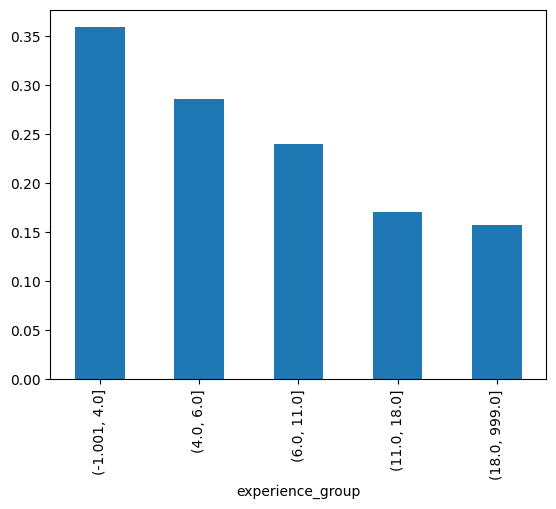

In [93]:
df.groupby("experience_group")["target"].mean().plot(kind="bar")

# Игрушечные данные 

In [112]:
t = pd.DataFrame({"coll":[1,2,3, float("nan")], 
                  "coll2":["a","b","c","d"],
                  "coll3":["0"]*3 + [1], 
                  "coll4":[0,0,0,0]})

In [113]:
t

,coll,coll2,coll3,coll4
0,1.0,a,0,0
1,2.0,b,0,0
2,3.0,c,0,0
3,NaN,d,1,0


# Функции агрегации 

In [120]:
t = pd.DataFrame({"coll":[1,2,3,float("nan")]})

In [121]:
t

,coll
0,1.0
1,2.0
2,3.0
3,NaN


In [123]:
t["coll"].sum()

6.0

In [124]:
t["coll"].mean()

2.0

In [125]:
t["coll"].count()

3

# Визуализация данных 

<Axes: >

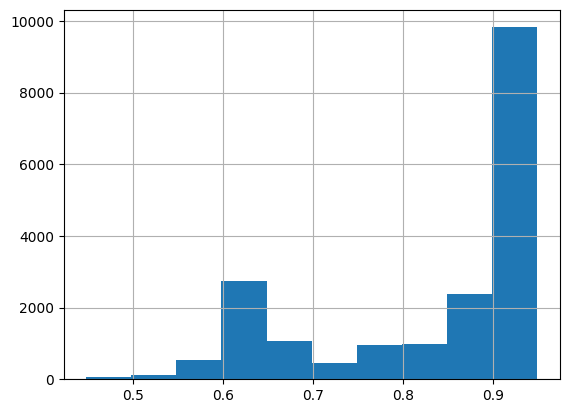

In [129]:
df["city_development_index"].hist()

In [131]:
df["gender"].value_counts()

gender
Male       13221
no_info     4508
Female      1238
Other        191
Name: count, dtype: int64

<Axes: >

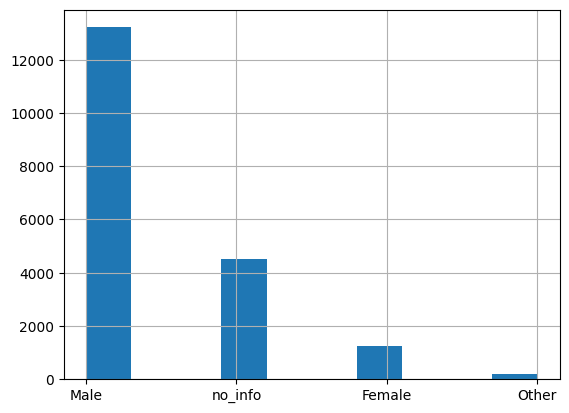

In [132]:
df["gender"].hist()

In [137]:
df["gender"].value_counts(dropna=False)

gender
Male       13221
no_info     4508
Female      1238
Other        191
Name: count, dtype: int64

In [138]:
df["gender"].value_counts()

gender
Male       13221
no_info     4508
Female      1238
Other        191
Name: count, dtype: int64

<Axes: xlabel='gender'>

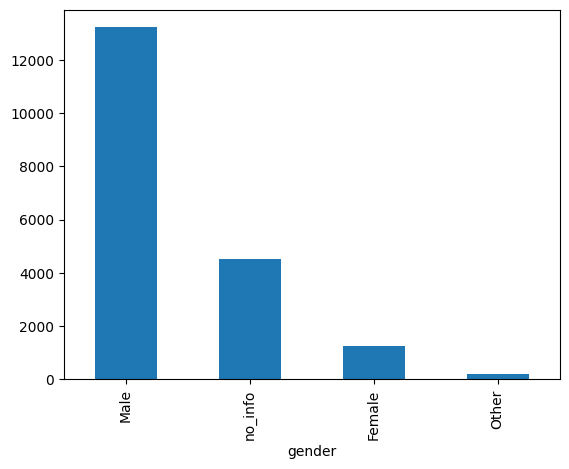

In [139]:
df["gender"].value_counts(dropna=False).plot(kind="bar")

# Скаттер

In [142]:
t = pd.DataFrame({"x":[1,2,3], "y":[1,3,2]})

In [143]:
t

,x,y
0,1,1
1,2,3
2,3,2


<Axes: xlabel='x', ylabel='y'>

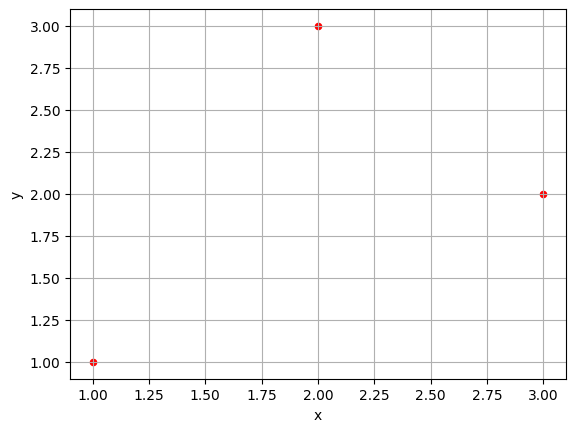

In [146]:
t.plot(x="x", y="y", kind="scatter", grid="true)

<Axes: xlabel='city_development_index', ylabel='experience_int'>

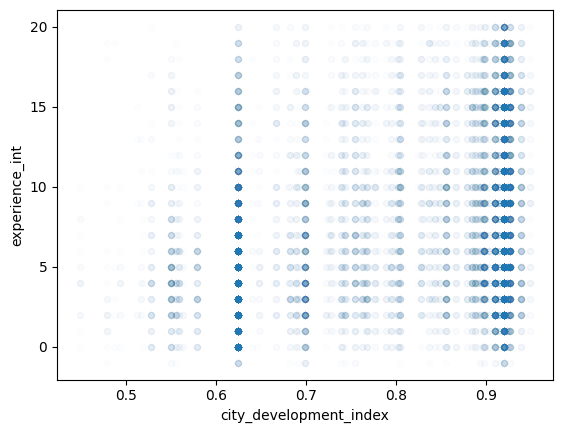

In [154]:
df[df["experience_int"] < 999].plot(x="city_development_index", y="experience_int", kind="scatter", alpha=0.01)

In [155]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q,city_development_index_group_custom,new_education_level,new_training_hours,experience_int,experience_group
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,1,36,1.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,36,999,"(18.0, 999.0]"
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,>4,47,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate,47,15,"(11.0, 18.0]"
2,11561,city_21,0.624,no_info,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,never,83,0.0,"(0.548, 0.648]","(0.447, 0.691]","(0.5, inf]",Graduate,83,5,"(4.0, 6.0]"
3,33241,city_115,0.789,no_info,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,never,52,1.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate,52,0,"(-1.001, 4.0]"
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,4,8,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Masters_and_Phd,8,999,"(18.0, 999.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,...,1,42,1.0,"(0.849, 0.949]","(0.691, 0.878]","(0.5, inf]",Graduate,42,14,"(11.0, 18.0]"
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,...,4,52,1.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,52,14,"(11.0, 18.0]"
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,...,4,44,0.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,44,999,"(18.0, 999.0]"
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,...,2,97,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",School,97,0,"(-1.001, 4.0]"


In [158]:
(df[df["experience_int"] < 999].
 groupby("city_development_index_group_q")["experience_int"].agg(["count","mean","median"]))

,count,mean,median
city_development_index_group_q,,,
"(0.447, 0.691]",3768,5.603238,5.0
"(0.691, 0.878]",3408,7.936620,7.0
"(0.878, 0.92]",6733,8.576860,8.0
"(0.92, 0.949]",1963,9.099338,9.0


<Axes: xlabel='city_development_index_group_q'>

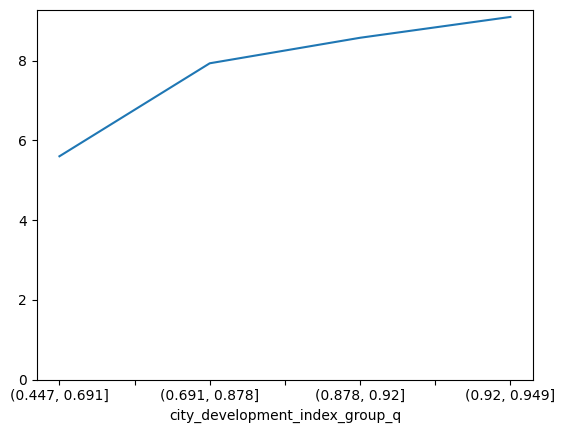

In [160]:
(df[df["experience_int"] < 999].
 groupby("city_development_index_group_q")["experience_int"].mean().plot(ylim=0))

# Джойны 

In [161]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q,city_development_index_group_custom,new_education_level,new_training_hours,experience_int,experience_group
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,1,36,1.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,36,999,"(18.0, 999.0]"
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,>4,47,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate,47,15,"(11.0, 18.0]"
2,11561,city_21,0.624,no_info,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,never,83,0.0,"(0.548, 0.648]","(0.447, 0.691]","(0.5, inf]",Graduate,83,5,"(4.0, 6.0]"
3,33241,city_115,0.789,no_info,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,never,52,1.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate,52,0,"(-1.001, 4.0]"
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,4,8,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Masters_and_Phd,8,999,"(18.0, 999.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,...,1,42,1.0,"(0.849, 0.949]","(0.691, 0.878]","(0.5, inf]",Graduate,42,14,"(11.0, 18.0]"
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,...,4,52,1.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,52,14,"(11.0, 18.0]"
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,...,4,44,0.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,44,999,"(18.0, 999.0]"
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,...,2,97,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",School,97,0,"(-1.001, 4.0]"


In [163]:
age = df[["enrollee_id"]].copy()

In [164]:
age["age"]= 30

In [165]:
age

,enrollee_id,age
0,8949,30
1,29725,30
2,11561,30
3,33241,30
4,666,30
...,...,...
19153,7386,30
19154,31398,30
19155,24576,30
19156,5756,30


In [169]:
df = df.merge(age, how="left",on="enrollee_id") # соединили два таблички по ключу enrollee_id

In [170]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,target,city_development_index_group,city_development_index_group_q,city_development_index_group_custom,new_education_level,new_training_hours,experience_int,experience_group,age
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,36,1.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,36,999,"(18.0, 999.0]",30
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,47,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate,47,15,"(11.0, 18.0]",30
2,11561,city_21,0.624,no_info,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,83,0.0,"(0.548, 0.648]","(0.447, 0.691]","(0.5, inf]",Graduate,83,5,"(4.0, 6.0]",30
3,33241,city_115,0.789,no_info,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,52,1.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Graduate,52,0,"(-1.001, 4.0]",30
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,8,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",Masters_and_Phd,8,999,"(18.0, 999.0]",30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,...,42,1.0,"(0.849, 0.949]","(0.691, 0.878]","(0.5, inf]",Graduate,42,14,"(11.0, 18.0]",30
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,...,52,1.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,52,14,"(11.0, 18.0]",30
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,...,44,0.0,"(0.849, 0.949]","(0.878, 0.92]","(0.5, inf]",Graduate,44,999,"(18.0, 999.0]",30
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,...,97,0.0,"(0.749, 0.849]","(0.691, 0.878]","(0.5, inf]",School,97,0,"(-1.001, 4.0]",30


In [171]:
len(df) # после джойна проверить не увеличился ли dataframe

19158

In [172]:
len(age)

19158

In [175]:
len(age["enrollee_id"].drop_duplicates())

19158

In [176]:
age.groupby("enrollee_id")["age"].min()

enrollee_id
1        30
2        30
4        30
5        30
7        30
         ..
33375    30
33376    30
33377    30
33379    30
33380    30
Name: age, Length: 19158, dtype: int64

# Numpy

In [179]:
type(df["city_development_index"].values)

numpy.ndarray

In [180]:
import numpy as np

In [183]:
np.mean([1,3,3,5,6,7])

4.166666666666667

In [187]:
np.random.normal()

1.0586950234715597

In [190]:
list(range(-10,10,2))

[-10, -8, -6, -4, -2, 0, 2, 4, 6, 8]

In [193]:
np.linspace(-10, 10, 100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [196]:
np.random.uniform(size=10) / 100 # Генерация шума 

array([0.00049791, 0.00140537, 0.0036112 , 0.00499922, 0.00778336,
       0.00445373, 0.00307349, 0.00036097, 0.00066658, 0.00653952])

In [202]:
a = np.array([1,2,3])
b = np.array([2,3,2])

a + b

array([3, 5, 5])

In [204]:
a = [1,2,3]
b = [2,3,4]

a + b

[1, 2, 3, 2, 3, 4]